## This notebook contains the solution to the first HomeWork of the Modern Control Theory course at the Hashemite University.

### The Question: Find the State space model for the following system assuming the outputs $𝑦1$ & $𝑦2$ then show the system step response and the PZmap
<p align="center">
<img src="https://i.imgur.com/WHdps6V.png" width=650>
</p>

$\sum F_{1} = m_{1} \ddot{y}_2$ \
$-k_1 y_2 - k_2(y_2 - y_1) - b_1 (\dot{y}_2 - \dot{y}_1) = m_1 \ddot{y}_2$ \
$\ddot{y}_2 = \frac{k_2}{m_1}y_1 - \frac{k_1 + k_2}{m_1} y_2 + \frac{b_1}{m_1} \dot{y}_1 - \frac{b_1}{m_1} \dot{y}_1$ \
\
$\sum F_{2} = m_{2} \ddot{y}_1$ \
$F(t) - k_2(y_1 - y_2) - b_1(\dot{y}_1 - \dot{y}_2) = m_2 \ddot{y}_1$ \
$\ddot{y}_1 = \frac{F(t)}{m_2} - \frac{k_2}{m_2} y_1 + \frac{k_2}{m_2} y_2 - \frac{b_1}{m_2} \dot{y}_1 + \frac{b_1}{m_2} \dot{y}_2$\
\
$Inputs: F(t) $\
$Outputs: y1, y2$ \
\
$x_1 = y_1 \rightarrow \dot{x}_1 = \dot{y}_1 = x_2$\
$x_2 = \dot{y}_1 \rightarrow \ddot{x}_2 = \ddot{y}_1 = \frac{F(t)}{m_2} - \frac{k_2}{m_2} x_1 + \frac{k_2}{m_2} x_3 - \frac{b_1}{m_2} x_2 + \frac{b_1}{m_2} x_4$\
$x_3 = y_2 \rightarrow \dot{x}_3 = \dot{y}_2 = x_4$\
$x_4 = \dot{y}_2 \rightarrow \dot{x}_4 = \ddot{y}_2 = \frac{k_2}{m_1} x_1 - \frac{k_1 + k_2}{m_1} x_3 + \frac{b_1}{m_1} x_2 - \frac{b_1}{m_1} x_4$\
\
\
$\dot{x} = Ax + Bu$\
$\begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \\ \dot{x}_3 \\ \dot{x}_4 \end{bmatrix} = \overbrace{\begin{bmatrix} 0 & 1 & 0 & 0 \\ -\frac{k_2}{m_2} & -\frac{b_1}{m_2} & \frac{k_2}{m_2} & \frac{b_1}{m_2} \\ 0 & 0 & 0 & 1 \\ \frac{k_2}{m_1} & \frac{b_1}{m_1} & - \frac{k_1 + k_2}{m_1} & -\frac{b_1}{m_1} \end{bmatrix} }^{A} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} + \underbrace{\begin{bmatrix} 0 \\ \frac{1}{m_2} \\ 0 \\ 0 \end{bmatrix}}_{B} u$\
\
$y = Cx + Du$\
$\begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \underbrace{\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix}}_{C} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} + 0$

In [96]:
# import necessary libraries
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy import linalg
from scipy.interpolate import make_interp_spline
import control as co

### State Space Model

In [97]:
# Simulation parameters
x0 = [0, 0, 0, 0]

start = 0
stop = 30
step = 1
t = np.arange(start, stop, step)

# Given parameters
k1 = 4
k2 = 3
m1 = 12
m2 = 24
b1 = 2

# State-Space Model Matrices
A = np.array([ [0, 1, 0, 0],
             [-k2/m2, -b1/m2, k2/m2, b1/m2],
             [0, 0, 0, 1],
             [k2/m1, b1/m1, -(k1+k2)/m1, -b1/m1]])

B = np.array([ [0],
               [1/m2],
               [0],
               [0]])

C = np.array([ [1, 0, 0, 0],
               [0, 0, 1, 0]])

D = np.array([[0], [0]])

# State-Space Model
sys =  sig.StateSpace(A, B, C, D)

### Step Response

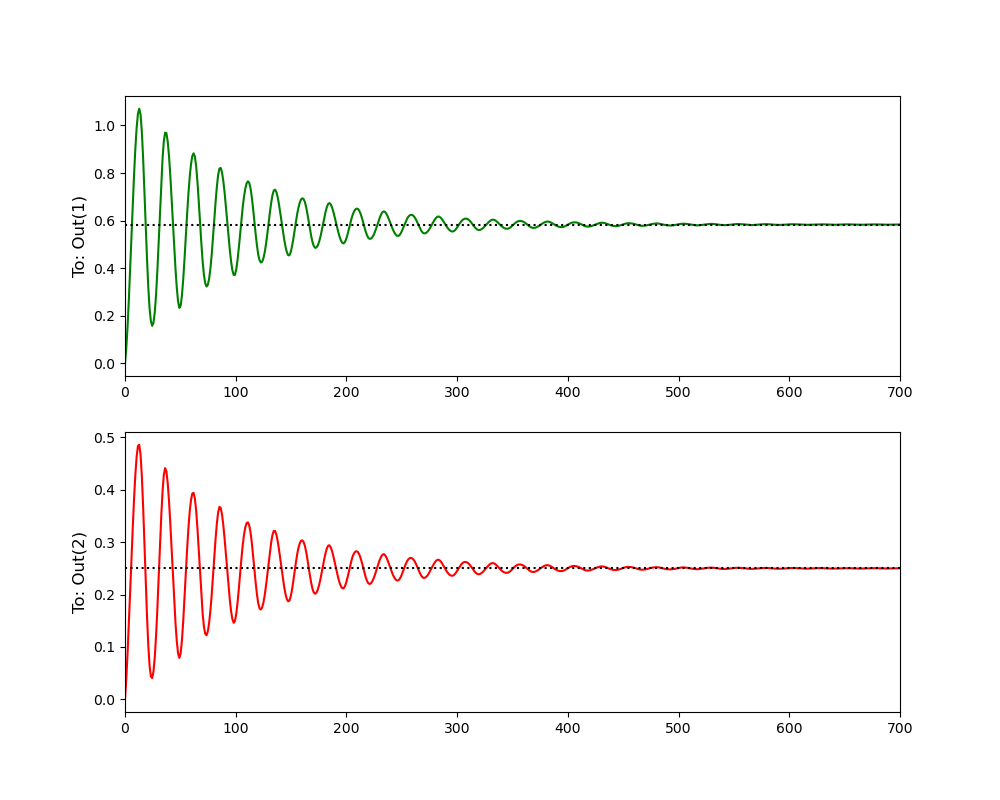

In [98]:
t, y = sig.step(sys) # step response
gain = -((C.dot(linalg.inv(A))).dot(B)) # gain of the system (steady state)

figure = plt.figure(figsize=(10, 8))

ax = dict()

### First plot
ax["A"] = figure.add_subplot(2, 1, 1)
ax["A"].set_xlim([0, np.max(t)])


# Interpolation to make the plot smoother
y_1 = y[:, 0]
spline1 = make_interp_spline(t, y_1)
x1 = np.linspace(t.min(), t.max(), 600)
y1 = spline1(x1)

plt.plot(x1, y1, 'g');
plt.axhline(y=gain[0], color='black', linestyle=':')
plt.ylabel("To: Out(1)", size=12)
plt.grid(False)


### Second plot
ax["B"] = figure.add_subplot(2, 1, 2)
ax["B"].set_xlim([0, np.max(t)])

# Interpolation to make the plot smoother
y_2 = y[:, 1]
spline2 = make_interp_spline(t, y_2)
x2 = np.linspace(t.min(), t.max(), 600)
y2 = spline2(x2)

plt.plot(x2, y2, 'r');
plt.axhline(y=gain[1], color='black', linestyle=':')
plt.ylabel("To: Out(2)", size=12)
plt.grid(False)
plt.show()

figure.suptitle("Step Response", size=16)
figure.supxlabel("Time", size=14)
figure.supylabel("Amplitude", size=14)
plt.close(2)

### PZmap

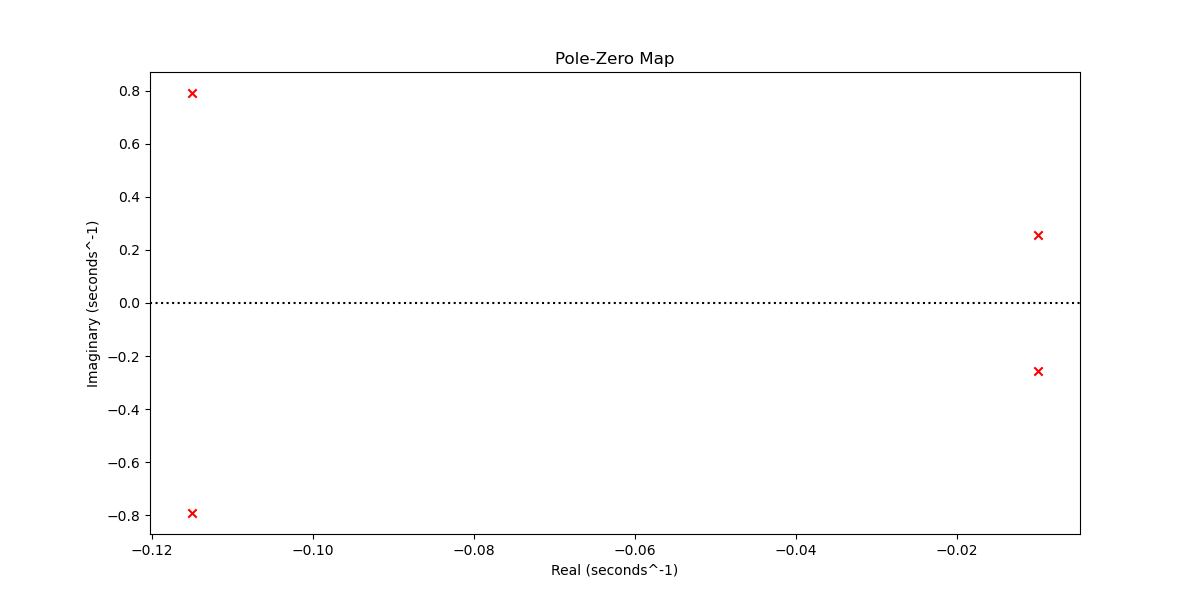

In [100]:
# Define the operating point
x_op = np.array([0, 0, 0, 0])
u_op = np.array([0])

sys_2 = co.StateSpace(A, B, C, D)
sys_2 = co.ss2io(sys_2)

# Linearize the model around the operating point
sys_lin = co.linearize(sys_2, x_op, u_op)

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

poles, zeros = co.pzmap(sys_lin, plot=False) # get the poles and zeros
ax.scatter(np.real(poles), np.imag(poles), marker='x', color='r')

# set the title, xlabel, and ylabel of the axis
ax.set_title('Pole-Zero Map')
ax.set_xlabel('Real (seconds^-1)')
ax.set_ylabel('Imaginary (seconds^-1)')
ax.axhline(y=0, linestyle=':', color='k')

plt.show()